In [34]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [35]:
DATA_FILES_DIR = './data/'
OUTPUT_CHARTS_DIR = './charts/'

if not os.path.exists(DATA_FILES_DIR):
    print(f'ERROR: cannot find dir {DATA_FILES_DIR}')
if not os.path.exists(OUTPUT_CHARTS_DIR):
    os.makedirs(OUTPUT_CHARTS_DIR)

# COVID-19 statistics world wide

In [37]:
global_df = pd.read_csv("https://covid.ourworldindata.org/data/full_data.csv")
global_df['date'] = pd.to_datetime(global_df['date'])

In [38]:
first_date = global_df['date'].min()
last_date = global_df['date'].max()
print(f"Dates: {first_date} - {last_date}")
print(f'{global_df.shape} samples, attributes')
global_df.describe().T

Dates: 2020-01-21 00:00:00 - 2020-03-13 00:00:00
(2270, 6) samples, attributes


,count,mean,std,min,25%,50%,75%,max
new_cases,2146.0,123.272134,770.715508,-10.0,0.0,0.0,5.00,19572.0
new_deaths,382.0,25.712042,50.582235,0.0,0.0,1.0,27.00,338.0
total_cases,2270.0,2613.971806,13523.315718,1.0,2.0,7.0,34.75,132758.0
total_deaths,415.0,451.508434,988.136207,1.0,1.0,6.0,128.00,4955.0


In [39]:
from IPython.display import Markdown
Markdown("""
# Last Updated: {last_date}
""".format(last_date=last_date))


# Last Updated: 2020-03-13 00:00:00


## Global count and China

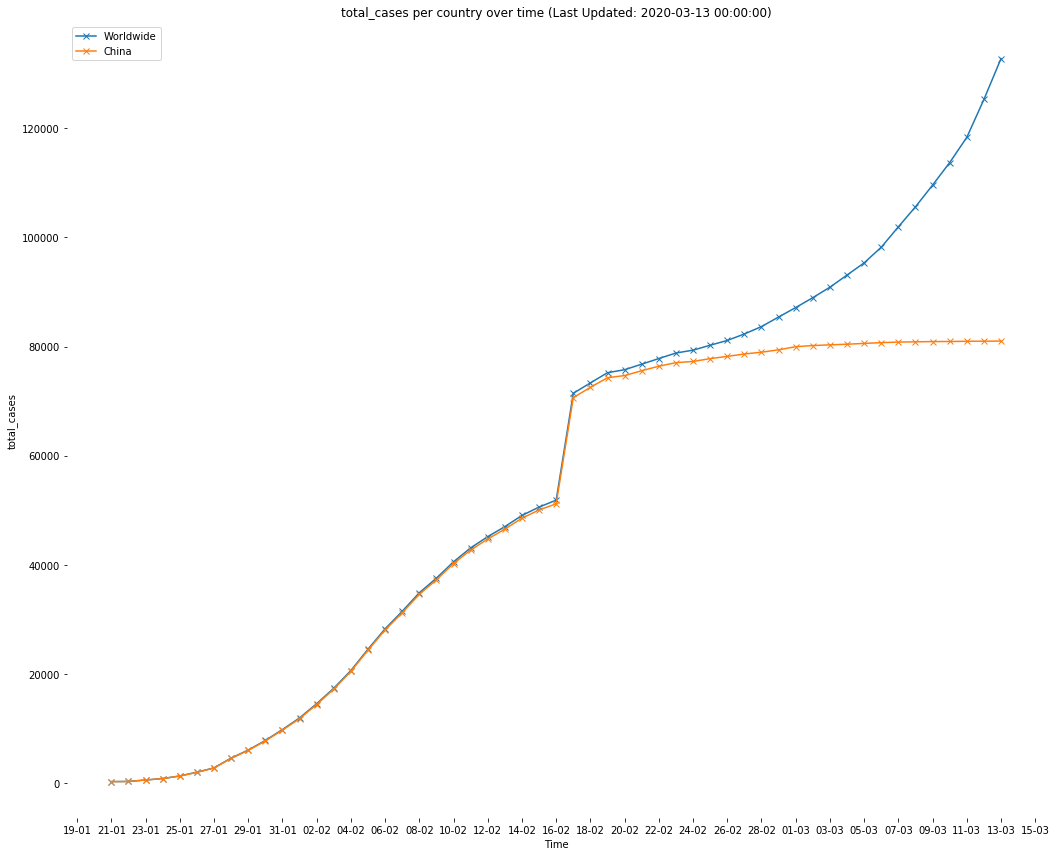

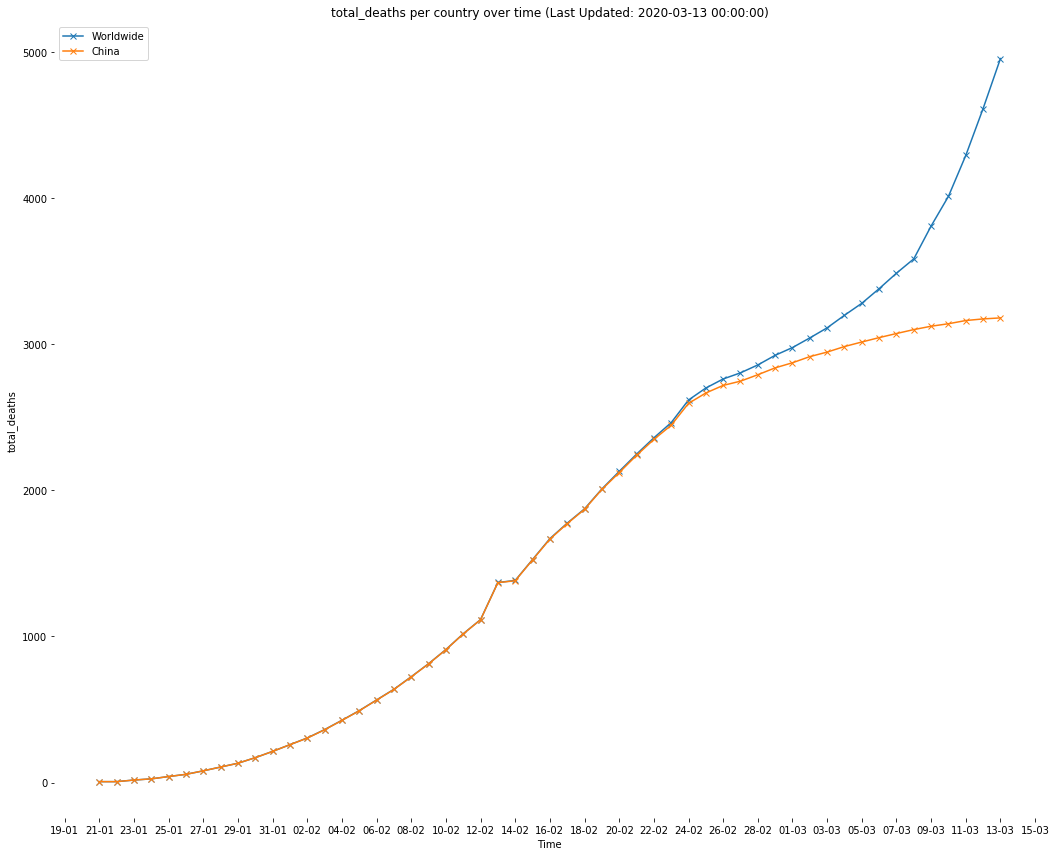

In [40]:
for stat in ['total_cases', 'total_deaths']:
    plt.figure(figsize=(15, 12))
    for region in global_df[(global_df['date']==last_date) & 
                             (global_df['location'].isin(['Worldwide', 'China']))].sort_values(by=stat, ascending=False)['location']:
        plt.plot(global_df[global_df['location'] == region]['date'], 
                 global_df[global_df['location'] == region][stat],
                 label=region,
                 marker='x')
    plt.xlabel('Time')
    plt.ylabel(f'{stat}')
    plt.title(f'{stat} per country over time (Last Updated: {last_date})')
    plt.legend()
    plt.box(False)
    plt.tight_layout()
    import matplotlib.dates as mdates
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
    plt.savefig(f'{OUTPUT_CHARTS_DIR}world_{stat}.png', dpi=300)

## All other countries (only the top 20, excluded China)

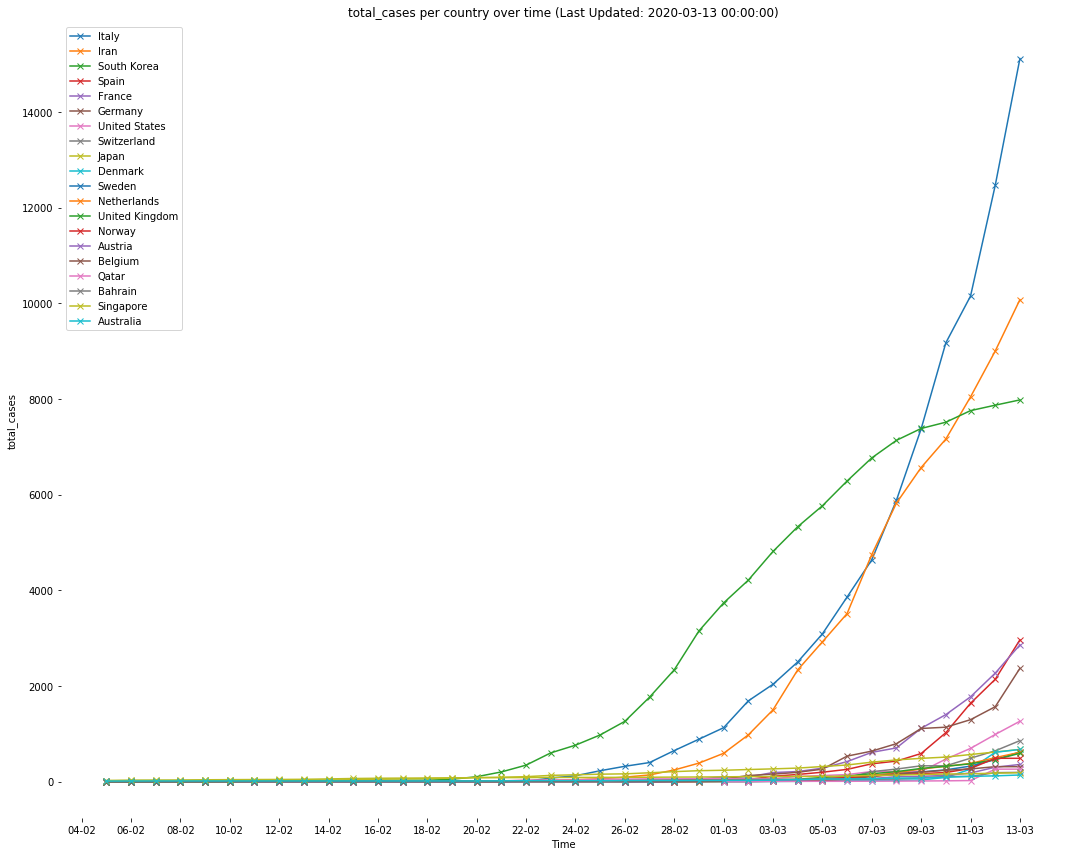

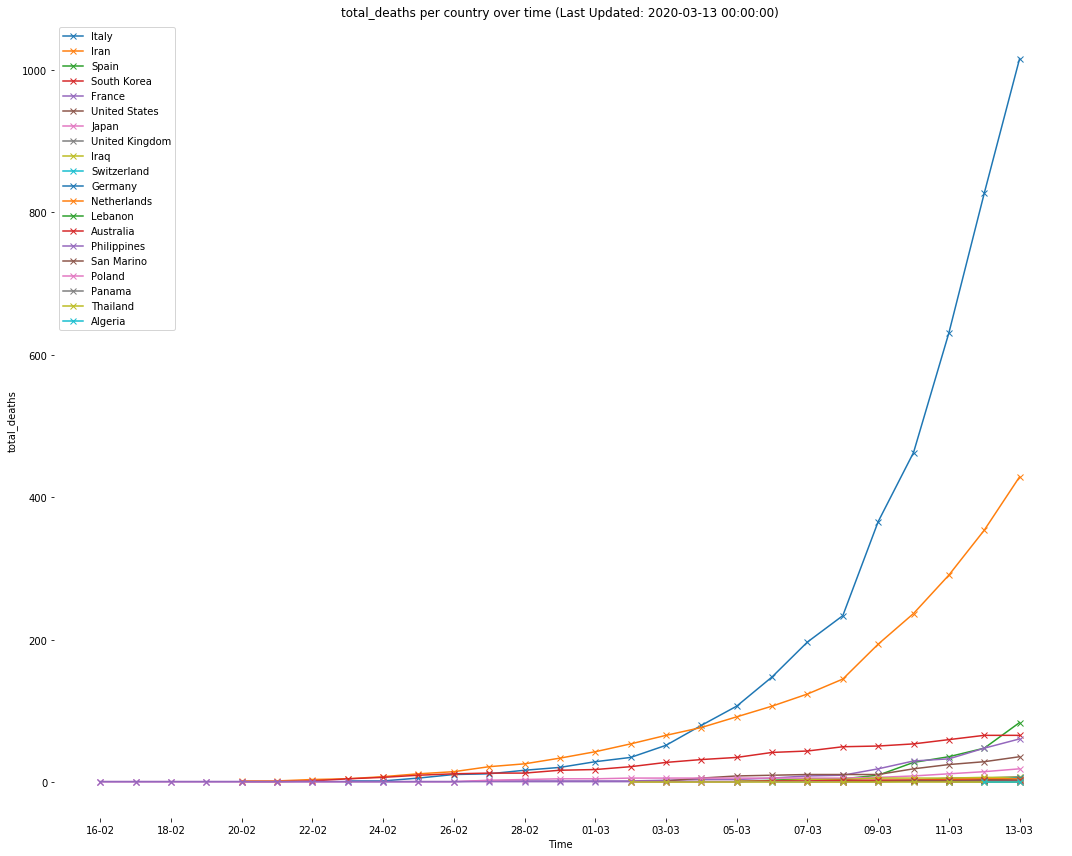

In [54]:
for stat in ['total_cases', 'total_deaths']:
    plt.figure(figsize=(15, 12))
    for region in global_df[(global_df['date']==last_date) & 
                             (~global_df['location'].isin(['Worldwide', 'China', 'International']))].sort_values(by=stat, ascending=False)['location'][:20]:
        plt.plot(global_df[(global_df['location'] == region) & (global_df['date'] > ('2020-02-04' if stat=='total_cases' else '2020-02-15'))]['date'], 
                 global_df[(global_df['location'] == region) & (global_df['date'] > ('2020-02-04' if stat=='total_cases' else '2020-02-15'))][stat],
                 label=region,
                 marker='x')
    plt.xlabel('Time')
    plt.ylabel(f'{stat}')
    plt.title(f'{stat} per country over time (Last Updated: {last_date})')
    plt.legend()
    plt.box(False)
    plt.tight_layout()
    import matplotlib.dates as mdates
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
    plt.savefig(f'{OUTPUT_CHARTS_DIR}countries_ex_china_{stat}.png', dpi=300)